In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import random

def init():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns = iris.feature_names)
    iris_np = df.to_numpy()
    X, y = df, iris.target
    k = range(1,25)

    return iris, X, y, k

def train_test_split_temp(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

    return X_train, X_test, y_train, y_test
6

def KNeighborsClassifier_predict(X_train, y_train, X_test, y_test, k):

    # X = pd.DataFrame(X).to_numpy()
    # X_list = X.tolist()
    # y_list = y.tolist()
    #
    # # X.reshape(1, -1)

    scores = {}
    score_list = []

    for k_range in k:
        knn= KNeighborsClassifier(n_neighbors=k_range)
        knn.fit(X, y)
        y_pred = knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test, y_pred)
        score_list.append(metrics.accuracy_score(y_test,y_pred))


    return score_list

def KNeighborsClassifier_predict_prob(X, y, k, predict_proba=None):

    X = pd.DataFrame(X).to_numpy()
    neigh = KNeighborsClassifier(n_neighbors=3)
    fit = neigh.fit(X, y)
    # print(X)
    predicted_prob = fit.predict([[predict_proba]])

    return predicted_prob

def CrossValidation(X, y, T):
    clf = svm.SVC(kernel='linear', C=100)
    score = cross_val_score(clf, X, y, cv=T)

    return score

def Optimizing(X, y, R1, R2, T):

    weight_options = ['uniform', 'distance']
    k_range = list(range(R1,R2))
    knn = KNeighborsClassifier(n_neighbors=T)
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    parameters = {'kernel':('linear', 'rbf'), 'C':[R1, R2]}
    svc = svm.SVC()
    clf = GridSearchCV(knn, param_grid, cv=T)

    return weight_options, clf.fit(X, y)

def PlottingBoundary(iris, X, y, T):


    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset

    X_np = pd.DataFrame(X).to_numpy()

    X_np = X_np[:, :2]
    y_np = np.array(y)
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(T, weights=weights)
        clf.fit(X_np, y_np)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
        y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        sns.scatterplot(x=X_np[:, 0], y=X_np[:, 1], hue=iris.target_names[y],
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (T, weights))
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])

    return plt.show()

def PlottingError(R1, R2,predict, y_test):

    k = [*range(R1, R2)]

    error = []
    for i in range(len(predict)):
        error.append(1 - predict[i])

    # plt.scatter(x=k, y=error)
    plt.plot(k, error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

    plt.xlabel("k range: ")
    plt.ylabel("error: ")
    plt.title("Error Rate vs K Value")
    return plt.show()

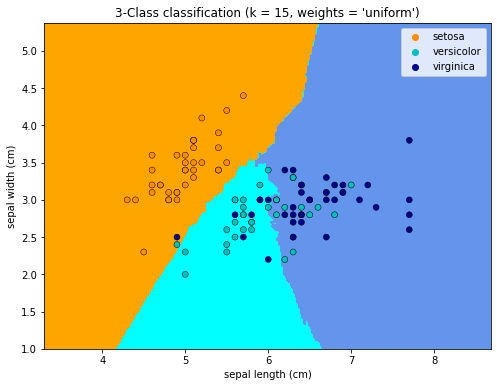

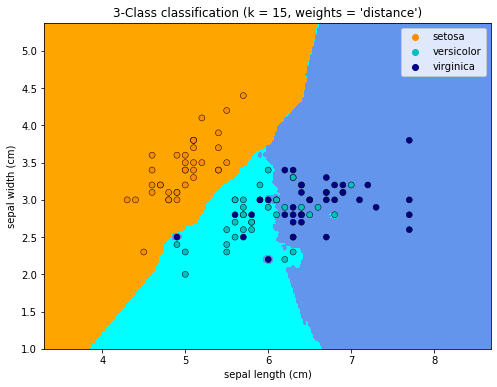

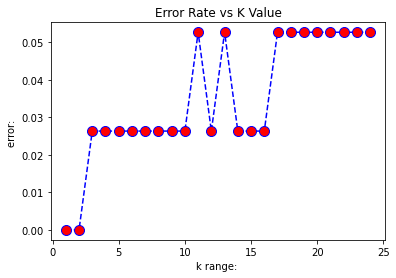

In [2]:
iris, X, y, k = init()

X_train, X_test, y_train, y_test = train_test_split_temp(X, y)

# print("X_train: ", X_train, "\n\n")
# print("X_test: ", X_test, "\n\n")
# print("y_train: ", y_train, "\n\n")
# print("y_test: ", y_test, "\n\n")

T = 15
R1 = 1
R2 = 25

fit_Train = KNeighborsClassifier_predict(X_train, y_train, X_test, y_test, k)
# print("Predict: ", fit_Train)

score = CrossValidation(X_train, y_train, T=T)
# print("Score: ", score)

weight_options, optimize = Optimizing(X_train, y_train, R1=R1, R2=R2, T=T)
# print(optimize)

plotBoundary = PlottingBoundary(iris, X_train, y_train, T)
# print(plotBoundary)

plotError = PlottingError(R1, R2, fit_Train, y_test)